<font size="3"><b>LOADING DATA SET</b></font>

In [11]:
# Loading data set using pandas.
!pip install pandas

import pandas as pd

file= "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head(10) #Printing top 10 rows

Defaulting to user installation because normal site-packages is not writeable


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


<font size="3"><b>ACCESSING A DATA FRAME</b></font>

In [12]:
# df.columns return columns of data frame
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')

<font size="3"><b>PRINTING STOPWORDS</b></font>

In [13]:
!pip install nltk

import nltk
import pandas as pd

#nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

# Specify the file path
file_path = "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())  


Defaulting to user installation because normal site-packages is not writeable
{'where', "you'll", 'in', 'down', 'won', 's', 'theirs', 'who', 'the', 'has', 'had', 'most', 'between', 'which', 'it', "mustn't", 'wasn', 'wouldn', 'he', 'she', 'itself', 'me', 'again', 'does', 'y', 'up', 'doesn', 'they', 'at', 'haven', 'yours', 'during', 'no', 'hers', 'are', 'be', 'through', 'weren', 'for', 'such', 'can', 'how', "she's", 'what', 't', 'why', 'themselves', 'to', 'being', "doesn't", 'shan', 'until', 'a', "you'd", 'her', 'on', 'hasn', "hasn't", 'isn', 'so', 'each', 'himself', 'my', 'under', "needn't", 'his', 'these', 'some', 'but', 'out', "isn't", 'while', 'before', "weren't", 'into', 're', 'was', 'nor', 'after', 'ain', 'hadn', 'too', 'will', 'mustn', 'have', 'just', 'our', 'off', 'or', 'below', 'both', 'with', "haven't", 'that', 'him', 'ma', 'very', "shan't", 'whom', 'above', 'once', 'd', 'didn', 'because', "shouldn't", 'other', 'ours', "don't", 'then', 'those', 'herself', 'any', 'all', 'aren', 

<font size="3"><b>REMOVING STOPWORDS</b></font>

In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
#nltk.download('stopwords')

# Load the CSV file into a DataFrame
file = "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"
dataframe = pd.read_csv(file)

# Assuming your text column is named 'text'
text_column_name = 'text'

# Use NLTK stopwords to the 'text' column
stop_words = set(stopwords.words('english'))
dataframe[text_column_name] = dataframe[text_column_name].apply(
    lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stop_words])
)

# Display the modified DataFrame
print(dataframe.head(10))


   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  
0         NaN  33: may first convey presi

<font size="3"><b>PRE-PROCESSING PIPELINE</b></font>

In [15]:
# Import necessary libraries
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus
#nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'dataframe'
dataframe = pd.read_csv("C:/Users/srima/Downloads/un-general-debates-blueprint.csv")

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame
dataframe[text_column_name+'_tokens'] = dataframe[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame
print(dataframe.head(10)) #printing


   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

<font size="3"><b>RUN THE PIPELINE</b></font>

In [16]:
# Import necessary libraries
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus
#nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'dataframe'
dataframe = pd.read_csv("C:/Users/srima/Downloads/un-general-debates-blueprint.csv")

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame
dataframe[text_column_name+'_tokens'] = dataframe[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame
print(dataframe.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

<font size="3"><b>COUNTING THE TOKENS</b></font>

In [17]:
from collections import Counter

# Assuming 'text_tokens' is the column containing tokenized text
counter = Counter()
dataframe['text_tokens'].map(counter.update)

freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)

# Display the top 10 frequent tokens
print(freq_df.head(10))


                 freq
token                
nations        124508
united         120763
international  117223
world           89421
countries       85734
peace           72625
development     62632
states          59713
people          59338
security        58425


<font size="3"><b>TFIDF AND COMPARE</b></font>

In [18]:
import numpy as np
from collections import Counter

def compute_idf(df, column='text_tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df']) + 0.1
    idf_df.index.name = 'token'
    return idf_df

# Assuming your DataFrame is named 'dataframe'
idf_df = compute_idf(dataframe)
print(idf_df.head(10))


               df       idf
token                      
best         3461  0.874278
undoubtedly  1155  1.971736
cooperate    1119  2.003400
apply         955  2.161880
covering      253  3.490202
deceitful      42  5.285922
concerned    4039  0.719839
engulfed      112  4.305092
armaments    1123  1.999832
hatching       16  6.251002


<font size="3"><b>TFIDF = TF *1DF</b></font>

In [19]:
# Multiply the term frequency (freq) by the inverse document frequency (idf) to calculate TF-IDF
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

# Display the first few rows of the DataFrame with the new TF-IDF column
print(freq_df.head())

                 freq         tfidf
token                              
nations        124508  12649.986284
united         120763  12285.608632
international  117223  12364.276226
world           89421   9503.708982
countries       85734  10888.485986


<font size="3"><b>DRAWING A WORD CLOUD</b></font>

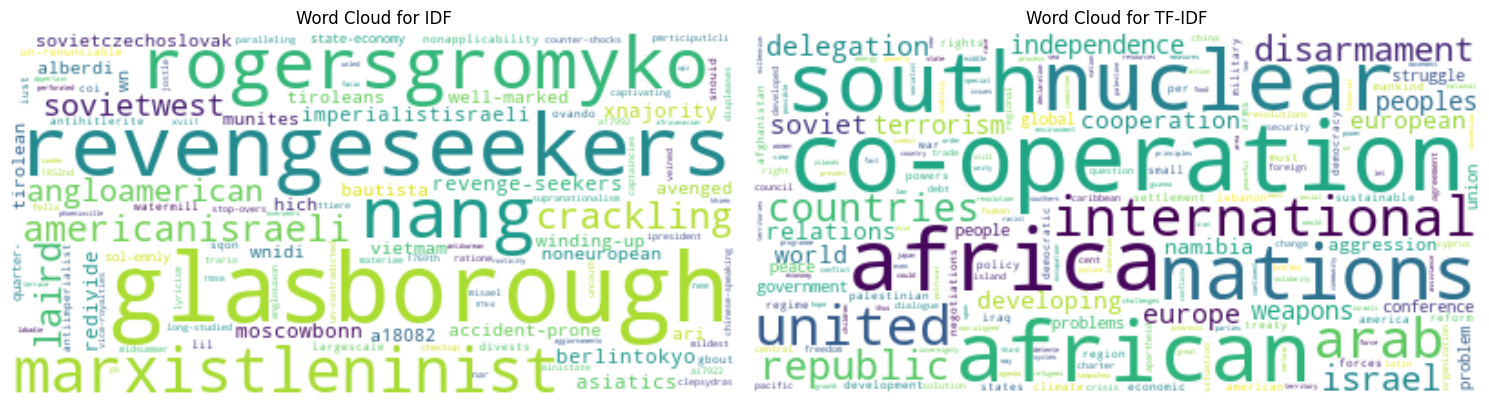

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Calculate IDF (Inverse Document Frequency) and TF-IDF (Term Frequency-Inverse Document Frequency)

# Multiply the term frequency (freq) by the inverse document frequency (idf) to calculate TF-IDF
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

# Generate word cloud for IDF
wordcloud_idf = WordCloud(background_color='white').generate_from_frequencies(idf_df['idf'].to_dict())

# Generate word cloud for TF-IDF
wordcloud_tfidf = WordCloud(background_color='white').generate_from_frequencies(freq_df['tfidf'].to_dict())

# Display the word clouds for IDF and TF-IDF
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_idf, interpolation='bilinear')
plt.title('Word Cloud for IDF')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.title('Word Cloud for TF-IDF')
plt.axis('off')

plt.tight_layout()
plt.show()

<font size="5"><b><center>COMPARING 1970 TF AND 1970 TFIDF</center></b></font>

<font size="3"><b>LOADING DATA SET</b></font>

In [21]:
# Import the pandas library
import pandas as pd

# Specify the file path
file = "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file)

# Filter the DataFrame to include only rows where the 'year' column is equal to 1970
df_1970 = df[df['year'] == 1970]

# Display the first 20 rows of the filtered DataFrame
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


<font size="3"><b>ACCESING DATA FRAME FOR THE YEAR 1970</b></font>

In [22]:
df_1970 = df[df['year'] == 1970]

# Display the DataFrame for the year 1970
print(df_1970.head())

   session  year country country_name             speaker position  \
0       25  1970     ALB      Albania             Mr. NAS      NaN   
1       25  1970     ARG    Argentina  Mr. DE PABLO PARDO      NaN   
2       25  1970     AUS    Australia         Mr. McMAHON      NaN   
3       25  1970     AUT      Austria  Mr. KIRCHSCHLAEGER      NaN   
4       25  1970     BEL      Belgium          Mr. HARMEL      NaN   

                                                text  
0  33: May I first convey to our President the co...  
1  177.\t : It is a fortunate coincidence that pr...  
2  100.\t  It is a pleasure for me to extend to y...  
3  155.\t  May I begin by expressing to Ambassado...  
4  176. No doubt each of us, before coming up to ...  


<font size="3"><b>PRINTING STOPWORDS FOR YEAR 1970</b></font>

In [23]:
!pip install nltk 

import nltk
import pandas as pd

# Download NLTK stopwords corpus
#nltk.download('stopwords')

# Get stopwords for English language
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

# Specify the file path for the CSV file containing the data for the year 1970
file_path = "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"

# Read the CSV file into a DataFrame
df_1970 = pd.read_csv(file_path)

# Filter the DataFrame to include only rows for the year 1970
df_1970 = df[df['year'] == 1970]

# Display the DataFrame for the year 1970
print(df_1970.head())

Defaulting to user installation because normal site-packages is not writeable
{'where', "you'll", 'in', 'down', 'won', 's', 'theirs', 'who', 'the', 'has', 'had', 'most', 'between', 'which', 'it', "mustn't", 'wasn', 'wouldn', 'he', 'she', 'itself', 'me', 'again', 'does', 'y', 'up', 'doesn', 'they', 'at', 'haven', 'yours', 'during', 'no', 'hers', 'are', 'be', 'through', 'weren', 'for', 'such', 'can', 'how', "she's", 'what', 't', 'why', 'themselves', 'to', 'being', "doesn't", 'shan', 'until', 'a', "you'd", 'her', 'on', 'hasn', "hasn't", 'isn', 'so', 'each', 'himself', 'my', 'under', "needn't", 'his', 'these', 'some', 'but', 'out', "isn't", 'while', 'before', "weren't", 'into', 're', 'was', 'nor', 'after', 'ain', 'hadn', 'too', 'will', 'mustn', 'have', 'just', 'our', 'off', 'or', 'below', 'both', 'with', "haven't", 'that', 'him', 'ma', 'very', "shan't", 'whom', 'above', 'once', 'd', 'didn', 'because', "shouldn't", 'other', 'ours', "don't", 'then', 'those', 'herself', 'any', 'all', 'aren', 

<font size="3"><b>REMOVING STOPWORDS FOR THE YEAR 1970</b></font>

In [24]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (uncomment the line below if stopwords are not downloaded)
#nltk.download('stopwords')

# Load the CSV file into a DataFrame
file = "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)

# Filter the DataFrame to include only rows for the year 1970
df_1970 = df[df['year'] == 1970].copy()

# Assuming your text column is named 'text'
text_column_name = 'text'

# Use NLTK stopwords to the 'text' column for the year 1970
stop_words = set(stopwords.words('english'))
df_1970[text_column_name] = df_1970[text_column_name].apply(
    lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stop_words])
)

# Display the modified DataFrame for the year 1970
print(df_1970.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  
0         NaN  33: may first convey presi

<font size="3"><b>PRE-PROCESSING PIPELINE FOR THE YEAR 1970</b></font>

In [25]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus
#nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'dataframe'
file = "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)

# Filter the DataFrame to include only rows for the year 1970
df_1970 = df[df['year'] == 1970].copy()

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame for the year 1970
df_1970[text_column_name+'_tokens'] = df_1970[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame for the year 1970
print(df_1970.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

<font size="3"><b>RUN THE PIPELINE FOR THE YEAR 1970</b></font>

In [26]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus
# nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'dataframe'
file = "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)

# Filter the DataFrame to include only rows for the year 1970
df_1970 = df[df['year'] == 1970].copy()

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame for the year 1970
df_1970[text_column_name+'_tokens'] = df_1970[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame for the year 1970
print(df_1970.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

<font size="3"><b>COUNTING THE TOKENS FOR THE YEAR 1970</b></font>

In [27]:
from collections import Counter

# Assuming 'text_tokens' is the column containing tokenized text
counter = Counter()
df_1970['text_tokens'].map(counter.update)

freq_df_1970 = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df_1970 = freq_df_1970.query('freq >= 1')
freq_df_1970.index.name = 'token'
freq_df_1970 = freq_df_1970.sort_values('freq', ascending=False)

# Display the top 10 frequent tokens for the year 1970
print(freq_df_1970.head(10))

               freq
token              
nations        1997
united         1996
international  1251
world          1093
peace           970
countries       908
states          896
organization    762
would           677
people          649


<font size="3"><b>TFIDF AND COMPARE FOR THE YEAR 1970</b></font>

In [28]:
import pandas as pd
import numpy as np
from collections import Counter
import regex as re
from nltk.corpus import stopwords
import nltk

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame for the year 1970 is named 'df_1970'
df_1970 = pd.read_csv("C:/Users/srima/Downloads/un-general-debates-blueprint.csv")

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame
df_1970['text_tokens'] = df_1970['text'].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Define IDF computation function
def compute_idf(df_1970, column='text_tokens', min_df_1970=1):
    def update(doc):
        counter.update(set(doc))
    # count tokens
    counter = Counter()
    df_1970[column].map(update)
    # create data frame and compute idf
    idf_df_1970 = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df_1970 = idf_df_1970.query('df >= @min_df_1970')
    idf_df_1970['idf'] = np.log(len(df_1970)/idf_df_1970['df']) + 0.1
    idf_df_1970.index.name = 'token'
    return idf_df_1970

# Compute IDF for the year 1970
idf_df_1970 = compute_idf(df_1970)
print(idf_df_1970.head(10))

               df       idf
token                      
best         3461  0.874278
undoubtedly  1155  1.971736
cooperate    1119  2.003400
apply         955  2.161880
covering      253  3.490202
deceitful      42  5.285922
concerned    4039  0.719839
engulfed      112  4.305092
armaments    1123  1.999832
hatching       16  6.251002


<font size="3"><b>TFIDF = TF *1DF FOR 1970</b></font>

In [29]:
# Multiply the term frequency (freq) by the inverse document frequency (idf) to calculate TF-IDF
freq_df_1970['tfidf'] = freq_df_1970['freq'] * idf_df_1970['idf']

# Display the first few rows of the DataFrame with the new TF-IDF column
print(freq_df_1970.head())

               freq       tfidf
token                          
nations        1997  202.894775
united         1996  203.059504
international  1251  131.951149
world          1093  116.164591
peace           970  121.468823


<font size="3"><b>DRAWING A WORD CLOUD FOR 1970</b></font>

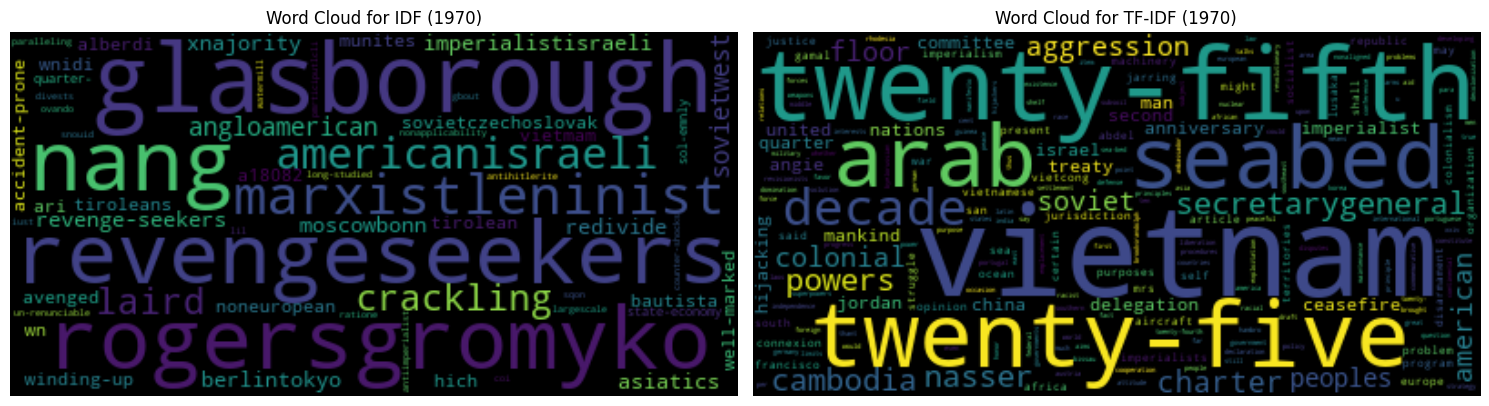

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have calculated IDF and TF-IDF values for the year 1970 and stored them in 'idf_df_1970' and 'freq_df_1970'

# Generate word cloud for IDF for the year 1970
wordcloud_idf_1970 = WordCloud(background_color='black').generate_from_frequencies(idf_df_1970['idf'].to_dict())

# Generate word cloud for TF-IDF for the year 1970
wordcloud_tfidf_1970 = WordCloud(background_color='black').generate_from_frequencies(freq_df_1970['tfidf'].to_dict())

# Display the word clouds for IDF and TF-IDF for the year 1970
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_idf_1970, interpolation='bilinear')
plt.title('Word Cloud for IDF (1970)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf_1970, interpolation='bilinear')
plt.title('Word Cloud for TF-IDF (1970)')
plt.axis('off')

plt.tight_layout()
plt.show()

<font size="5"><b><center>COMPARING 2015 TF AND 2015 TFIDF</center></b></font>

<font size="3"><b>LOADING DATA SET</b></font>

In [31]:
# Import the pandas library
import pandas as pd

# Specify the file path
file = "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file)

# Filter the DataFrame to include only rows where the 'year' column is equal to 2015
df_2015 = df[df['year'] == 2015]

# Display the first 20 rows of the filtered DataFrame
df_2015.head(20)

,session,year,country,country_name,speaker,position,text
7314,70,2015,AFG,Afghanistan,Mr. Abdullah Abdullah,Chief Executive Officer,"It gives me great pleasure, on behalf of the I..."
7315,70,2015,AGO,Angola,Mr. Manuel Domingos Vicente,vice-President,"At the outset, on behalf of the President of A..."
7316,70,2015,ALB,Albania,Mr. Edi Rama,Prime minister,"One year ago, Pope Francis began his visits ar..."
7317,70,2015,AND,Andorra,Mr. Antoni Martí Petit,Head of Government,"It is my honour to represent my country, the P..."
7318,70,2015,ARE,United Arab Emirates,Sheikh Abdullah Bin Zayed Al Nahyan,Minister for Foreign Affairs,It is my pleasure to congratulate Mr. Mogens L...
7319,70,2015,ARG,Argentina,Cristina Fernández,President,"At the outset, allow me to welcome a very rele..."
7320,70,2015,ARM,Armenia,Mr. Serzh Sargsyan,President,"I congratulate you, Mr. President, on your ele..."
7321,70,2015,ATG,Antigua and Barbuda,Mr. Gaston Alphonso Browne,Prime minister,"Democracy, peace, security, rule of law and re..."
7322,70,2015,AUS,Australia,Ms. Julie Bishop,Minister for Foreign Affairs,We meet this day at an important time for the ...
7323,70,2015,AUT,Austria,Mr. Sebastian Kurz,Minister for Foreign Affairs,"Seventy years ago, the United Nations was foun..."


<font size="3"><b>ACCESING DATA FRAME FOR THE YEAR 2015</b></font>

In [32]:
df_2015 = df[df['year'] == 2015]

# Display the DataFrame for the year 1970
print(df_2015.head())

      session  year country          country_name  \
7314       70  2015     AFG           Afghanistan   
7315       70  2015     AGO                Angola   
7316       70  2015     ALB               Albania   
7317       70  2015     AND               Andorra   
7318       70  2015     ARE  United Arab Emirates   

                                  speaker                      position  \
7314                Mr. Abdullah Abdullah       Chief Executive Officer   
7315          Mr. Manuel Domingos Vicente                vice-President   
7316                         Mr. Edi Rama                Prime minister   
7317               Mr. Antoni Martí Petit            Head of Government   
7318  Sheikh Abdullah Bin Zayed Al Nahyan  Minister for Foreign Affairs   

                                                   text  
7314  It gives me great pleasure, on behalf of the I...  
7315  At the outset, on behalf of the President of A...  
7316  One year ago, Pope Francis began his visits ar... 

<font size="3"><b>PRINTING STOPWORDS FOR YEAR 2015</b></font>

In [33]:
import nltk
import pandas as pd

# Download NLTK stopwords corpus
# nltk.download('stopwords')

# Get stopwords for English language
stopwords = set(nltk.corpus.stopwords.words('english'))

# Specify the file path for the CSV file containing the data for the year 2015
file_path = "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"
# Read the CSV file into a DataFrame
df_2015 = pd.read_csv(file_path)

# Filter the DataFrame to include only rows for the year 2015
df_2015 = df_2015[df_2015['year'] == 2015]

# Display the DataFrame for the year 2015
print(df_2015.head())

      session  year country          country_name  \
7314       70  2015     AFG           Afghanistan   
7315       70  2015     AGO                Angola   
7316       70  2015     ALB               Albania   
7317       70  2015     AND               Andorra   
7318       70  2015     ARE  United Arab Emirates   

                                  speaker                      position  \
7314                Mr. Abdullah Abdullah       Chief Executive Officer   
7315          Mr. Manuel Domingos Vicente                vice-President   
7316                         Mr. Edi Rama                Prime minister   
7317               Mr. Antoni Martí Petit            Head of Government   
7318  Sheikh Abdullah Bin Zayed Al Nahyan  Minister for Foreign Affairs   

                                                   text  
7314  It gives me great pleasure, on behalf of the I...  
7315  At the outset, on behalf of the President of A...  
7316  One year ago, Pope Francis began his visits ar... 

<font size="3"><b>REMOVING STOPWORDS FOR THE YEAR 2015</b></font>

In [34]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (uncomment the line below if stopwords are not downloaded)
# nltk.download('stopwords')

# Load the CSV file into a DataFrame
file_path = "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file_path)

# Filter the DataFrame to include only rows for the year 2015
df_2015 = df[df['year'] == 2015].copy()

# Assuming your text column is named 'text'
text_column_name = 'text'

# Use NLTK stopwords for the 'text' column for the year 2015
stop_words = set(stopwords.words('english'))
df_2015[text_column_name] = df_2015[text_column_name].apply(
    lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stop_words])
)

# Display the modified DataFrame for the year 2015
print(df_2015.head(10))


      session  year country          country_name  \
7314       70  2015     AFG           Afghanistan   
7315       70  2015     AGO                Angola   
7316       70  2015     ALB               Albania   
7317       70  2015     AND               Andorra   
7318       70  2015     ARE  United Arab Emirates   
7319       70  2015     ARG             Argentina   
7320       70  2015     ARM               Armenia   
7321       70  2015     ATG   Antigua and Barbuda   
7322       70  2015     AUS             Australia   
7323       70  2015     AUT               Austria   

                                  speaker                      position  \
7314                Mr. Abdullah Abdullah       Chief Executive Officer   
7315          Mr. Manuel Domingos Vicente                vice-President   
7316                         Mr. Edi Rama                Prime minister   
7317               Mr. Antoni Martí Petit            Head of Government   
7318  Sheikh Abdullah Bin Zayed Al Nahyan

<font size="3"><b>PRE-PROCESSING PIPELINE FOR THE YEAR 2015</b></font>

In [35]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus (uncomment the line below if stopwords are not downloaded)
# nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'dataframe'
file_path = "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file_path)

# Filter the DataFrame to include only rows for the year 2015
df_2015 = df[df['year'] == 2015].copy()

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame for the year 2015
df_2015[text_column_name+'_tokens'] = df_2015[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame for the year 2015
print(df_2015.head(10))


      session  year country          country_name  \
7314       70  2015     AFG           Afghanistan   
7315       70  2015     AGO                Angola   
7316       70  2015     ALB               Albania   
7317       70  2015     AND               Andorra   
7318       70  2015     ARE  United Arab Emirates   
7319       70  2015     ARG             Argentina   
7320       70  2015     ARM               Armenia   
7321       70  2015     ATG   Antigua and Barbuda   
7322       70  2015     AUS             Australia   
7323       70  2015     AUT               Austria   

                                  speaker                      position  \
7314                Mr. Abdullah Abdullah       Chief Executive Officer   
7315          Mr. Manuel Domingos Vicente                vice-President   
7316                         Mr. Edi Rama                Prime minister   
7317               Mr. Antoni Martí Petit            Head of Government   
7318  Sheikh Abdullah Bin Zayed Al Nahyan

<font size="3"><b>RUN THE PIPELINE FOR THE YEAR 2015</b></font>

In [36]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus (uncomment the line below if stopwords are not downloaded)
# nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'df'
file_path = "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file_path)

# Filter the DataFrame to include only rows for the year 2015
df_2015 = df[df['year'] == 2015].copy()

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame for the year 2015
df_2015[text_column_name+'_tokens'] = df_2015[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame for the year 2015
print(df_2015.head(10))


      session  year country          country_name  \
7314       70  2015     AFG           Afghanistan   
7315       70  2015     AGO                Angola   
7316       70  2015     ALB               Albania   
7317       70  2015     AND               Andorra   
7318       70  2015     ARE  United Arab Emirates   
7319       70  2015     ARG             Argentina   
7320       70  2015     ARM               Armenia   
7321       70  2015     ATG   Antigua and Barbuda   
7322       70  2015     AUS             Australia   
7323       70  2015     AUT               Austria   

                                  speaker                      position  \
7314                Mr. Abdullah Abdullah       Chief Executive Officer   
7315          Mr. Manuel Domingos Vicente                vice-President   
7316                         Mr. Edi Rama                Prime minister   
7317               Mr. Antoni Martí Petit            Head of Government   
7318  Sheikh Abdullah Bin Zayed Al Nahyan

<font size="3"><b>COUNTING THE TOKENS FOR THE YEAR 2015</b></font>

In [37]:
from collections import Counter

# Assuming 'text_tokens' is the column containing tokenized text
counter = Counter()
df_2015['text_tokens'].map(counter.update)

freq_df_2015 = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df_2015 = freq_df_2015.query('freq >= 1')
freq_df_2015.index.name = 'token'
freq_df_2015 = freq_df_2015.sort_values('freq', ascending=False)

# Display the top 10 frequent tokens for the year 2015
print(freq_df_2015.head(10))

               freq
token              
nations        2587
united         2571
development    1754
international  1727
world          1635
security       1391
peace          1281
people         1229
countries      1086
must           1033


<font size="3"><b>TFIDF AND COMPARE FOR THE YEAR 2015</b></font>

In [38]:
import pandas as pd
import numpy as np
from collections import Counter
import regex as re
from nltk.corpus import stopwords
import nltk

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame for the year 2015 is named 'df_2015'
df_2015 = pd.read_csv("C:/Users/srima/Downloads/un-general-debates-blueprint.csv")

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame
df_2015['text_tokens'] = df_2015['text'].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Define IDF computation function
def compute_idf(df, column='text_tokens', min_df=1):
    def update(doc):
        counter.update(set(doc))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df']) + 0.1
    idf_df.index.name = 'token'
    return idf_df

# Compute IDF for the year 2015
idf_df_2015 = compute_idf(df_2015)
print(idf_df_2015.head(10))

               df       idf
token                      
best         3461  0.874278
undoubtedly  1155  1.971736
cooperate    1119  2.003400
apply         955  2.161880
covering      253  3.490202
deceitful      42  5.285922
concerned    4039  0.719839
engulfed      112  4.305092
armaments    1123  1.999832
hatching       16  6.251002


<font size="3"><b>TFIDF = TF *1DF FOR 2015</b></font>

In [39]:
# Multiply the term frequency (freq) by the inverse document frequency (idf) to calculate TF-IDF
freq_df_2015['tfidf'] = freq_df_2015['freq'] * idf_df_2015['idf']

# Display the first few rows of the DataFrame with the new TF-IDF column
print(freq_df_2015.head())

               freq       tfidf
token                          
nations        2587  262.838649
united         2571  261.556104
development    1754  245.473993
international  1727  182.157981
world          1635  173.768625


<font size="3"><b>DRAWING A WORD CLOUD FOR 2015</b></font>

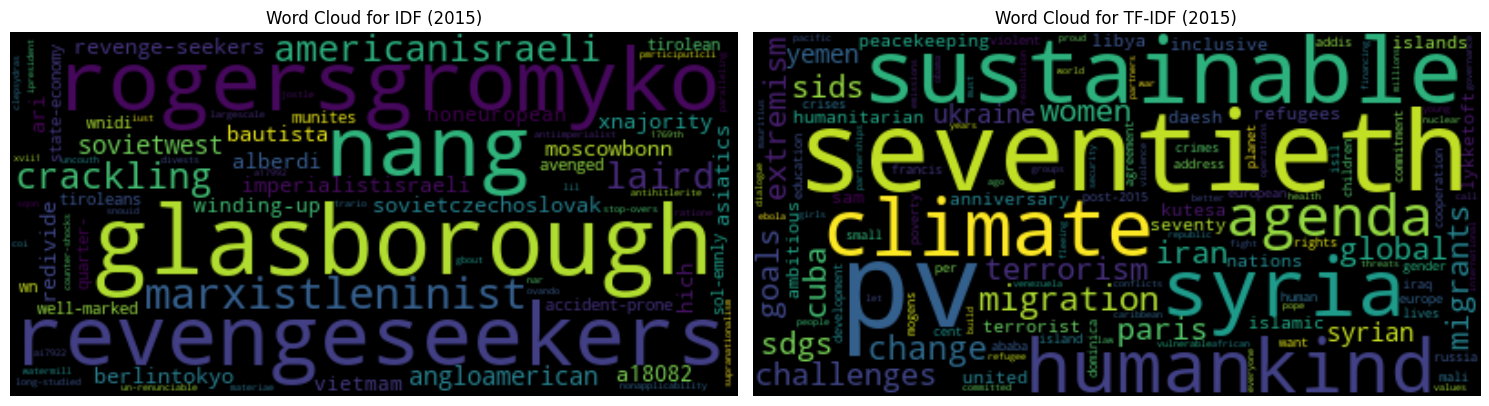

In [40]:
# Generate word cloud for IDF for the year 2015
wordcloud_idf_2015 = WordCloud(background_color='black').generate_from_frequencies(idf_df_2015['idf'].to_dict())

# Generate word cloud for TF-IDF for the year 2015
wordcloud_tfidf_2015 = WordCloud(background_color='black').generate_from_frequencies(freq_df_2015['tfidf'].to_dict())

# Display the word clouds for IDF and TF-IDF for the year 2015
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_idf_2015, interpolation='bilinear')
plt.title('Word Cloud for IDF (2015)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf_2015, interpolation='bilinear')
plt.title('Word Cloud for TF-IDF (2015)')
plt.axis('off')

plt.tight_layout()
plt.show()


<font size="5"><b><CENTER>FREQUENCY HEATMAPS</CENTER></b></font>

<font size="3"><b>LOADING DATASET</b></font>

In [41]:
# Loading data set using pandas.
!pip install pandas

import pandas as pd

file= "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head(10)

Defaulting to user installation because normal site-packages is not writeable


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


<font size="3"><b>PRINTING STOPWORDS</b></font>

In [42]:
!pip install nltk

import nltk
import pandas as pd

#nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

# Specify the file path
file_path = "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())  

Defaulting to user installation because normal site-packages is not writeable
{'where', "you'll", 'in', 'down', 'won', 's', 'theirs', 'who', 'the', 'has', 'had', 'most', 'between', 'which', 'it', "mustn't", 'wasn', 'wouldn', 'he', 'she', 'itself', 'me', 'again', 'does', 'y', 'up', 'doesn', 'they', 'at', 'haven', 'yours', 'during', 'no', 'hers', 'are', 'be', 'through', 'weren', 'for', 'such', 'can', 'how', "she's", 'what', 't', 'why', 'themselves', 'to', 'being', "doesn't", 'shan', 'until', 'a', "you'd", 'her', 'on', 'hasn', "hasn't", 'isn', 'so', 'each', 'himself', 'my', 'under', "needn't", 'his', 'these', 'some', 'but', 'out', "isn't", 'while', 'before', "weren't", 'into', 're', 'was', 'nor', 'after', 'ain', 'hadn', 'too', 'will', 'mustn', 'have', 'just', 'our', 'off', 'or', 'below', 'both', 'with', "haven't", 'that', 'him', 'ma', 'very', "shan't", 'whom', 'above', 'once', 'd', 'didn', 'because', "shouldn't", 'other', 'ours', "don't", 'then', 'those', 'herself', 'any', 'all', 'aren', 

<font size="3"><b>REMOVING STOPWORDS</b></font>

In [43]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
#nltk.download('stopwords')

# Load the CSV file into a DataFrame
file = "C:/Users/srima/Downloads/un-general-debates-blueprint.csv"
dataframe = pd.read_csv(file)

# Assuming your text column is named 'text'
text_column_name = 'text'

# Use NLTK stopwords to the 'text' column
stop_words = set(stopwords.words('english'))
dataframe[text_column_name] = dataframe[text_column_name].apply(
    lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stop_words])
)

# Display the modified DataFrame
print(dataframe.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  
0         NaN  33: may first convey presi

<font size="3"><b>PRE-PROCESSING PIPELINE</b></font>

In [44]:
# Import necessary libraries
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus
#nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'dataframe'
dataframe = pd.read_csv("C:/Users/srima/Downloads/un-general-debates-blueprint.csv")

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame
dataframe[text_column_name+'_tokens'] = dataframe[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame
print(dataframe.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

<font size="3"><b>RUN THE PIPELINE</b></font>

In [45]:
# Import necessary libraries
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus
#nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'dataframe'
dataframe = pd.read_csv("C:/Users/srima/Downloads/un-general-debates-blueprint.csv")

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame
dataframe[text_column_name+'_tokens'] = dataframe[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame
print(dataframe.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

<font size="3"><b>COUNTING THE TOKENS</b></font>

In [46]:
from collections import Counter

# Assuming 'text_tokens' is the column containing tokenized text
counter = Counter()
dataframe['text_tokens'].map(counter.update)

freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)

# Display the top 10 frequent tokens
print(freq_df.head(10))

                 freq
token                
nations        124508
united         120763
international  117223
world           89421
countries       85734
peace           72625
development     62632
states          59713
people          59338
security        58425


<font size="3"><b>COUNTING KEYWORDS</b></font>

In [47]:
df['num_tokens'] = dataframe['text_tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]
print(df['num_tokens'])

0       4092
1       2341
2       2575
3       2166
4       2064
        ... 
7502     894
7503    2118
7504    1160
7505    1197
7506     903
Name: num_tokens, Length: 7507, dtype: int64


<font size="3"><b>FUNCTION TO GROUPBY YEAR</b></font>

In [48]:
def count_keywords_by(dataframe, by, keywords, column='text_tokens'):
    """
    Count the occurrences of keywords in a DataFrame grouped by specified column(s).

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        by (str or list of str): The column(s) to group by.
        keywords (list): The list of keywords to count occurrences of.
        column (str): The column containing the tokenized text data (default is 'tokens').

    Returns:
        DataFrame: A DataFrame with the counts of keywords grouped by the specified column(s).
    """
    # Reset the index of the DataFrame if it has gaps
    df = dataframe.reset_index(drop=True)
    
    # Apply the count_keywords function to each row of the specified column
    freq_matrix = dataframe[column].apply(count_keywords, keywords=keywords)
    
    # Create a DataFrame from the frequency matrix with columns as keywords
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    
    # Copy the grouping column(s) to the frequency DataFrame
    freq_df[by] = dataframe[by]
    
    # Group by the specified column(s) and sum the counts of keywords
    return freq_df.groupby(by=by).sum().sort_values(by)

# Assuming 'df' is your DataFrame and you want to count occurrences of keywords grouped by the 'category' column
result_df = count_keywords_by(dataframe, by='year', keywords=['keyword1', 'keyword2', 'keyword3'])

# Display the resulting DataFrame
print(result_df)


      keyword1  keyword2  keyword3
year                              
1970         0         0         0
1971         0         0         0
1972         0         0         0
1973         0         0         0
1974         0         0         0
1975         0         0         0
1976         0         0         0
1977         0         0         0
1978         0         0         0
1979         0         0         0
1980         0         0         0
1981         0         0         0
1982         0         0         0
1983         0         0         0
1984         0         0         0
1985         0         0         0
1986         0         0         0
1987         0         0         0
1988         0         0         0
1989         0         0         0
1990         0         0         0
1991         0         0         0
1992         0         0         0
1993         0         0         0
1994         0         0         0
1995         0         0         0
1996         0      

<font size="3"><b>HEATMAP</b></font>

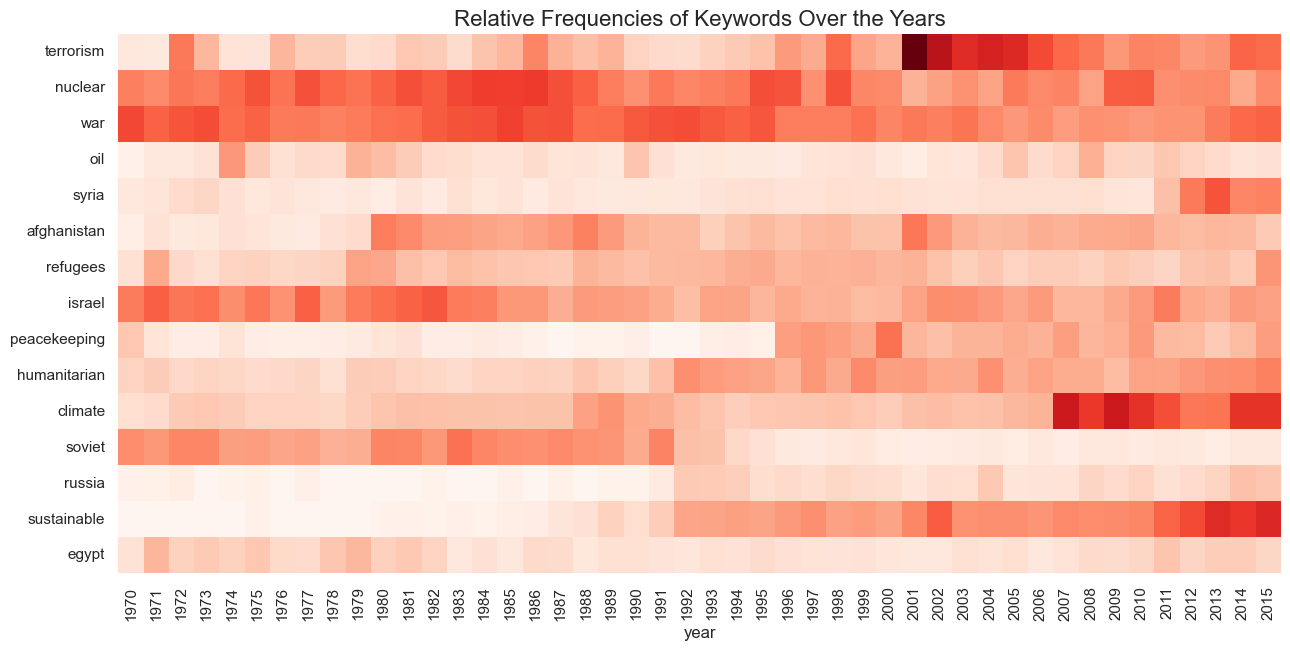

In [49]:
import seaborn as sns

# List of keywords to visualize
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  

# Count occurrences of keywords by year and normalize by the total number of tokens per year
freq_df = count_keywords_by(dataframe, by='year', keywords=keywords)
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)

# Apply square root transformation for better contrast
freq_df = freq_df.apply(np.sqrt)

# Plot the heatmap
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")

# Set the title and adjust font size
plt.title('Relative Frequencies of Keywords Over the Years', fontsize=16)
sns.set(font_scale=1)